# Laboratorio 3
### Javier Mombiela 20067
### Roberto Rios 200769

#### Importando Librerias

In [106]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import Dense, LSTM, SimpleRNN, BatchNormalization

#### Funciones para definir las arquitecturas

In [107]:
# create_FNNN: funcion que define la arquitectura de la red neuronal feed forward
def create_FFNN(hidden_units, input_shape, activation):
    model = Sequential([
        Dense(hidden_units[0], input_shape=input_shape, activation=activation[0]),
        Dense(hidden_units[1], activation=activation[1]),
        Dense(hidden_units[2], activation=activation[2]),
        Dense(1, activation=activation[3])
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

# create_RNN: funcion que crea una red neuronal recurrente
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(
        hidden_units
        , input_shape=input_shape
        , activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# create_LSTM: función que crea una red neuronal LSTM
def create_LSTM(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(
        hidden_units,
        input_shape=input_shape,
        activation=activation[0]
    ))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

##### Funciones para obtener los datos

In [108]:
# get_train_test: funcion que obtiene los datos de entrenamiento y prueba
def get_train_test(dataset, split_percent=0.8):
    df = pd.read_csv(dataset, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# get_XY: funcion que obtiene los datos de entrada y salida
def get_XY(dat, time_steps=None):
    if time_steps is None:
        X = dat[:-1]  # Todas las muestras excepto la última
        Y = dat[1:]   # Todas las muestras excepto la primera
    else:
        Y_ind = np.arange(time_steps, len(dat), time_steps)
        Y = dat[Y_ind]
        rows_x = len(Y)
        X = dat[range(time_steps * rows_x)]
        X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

#### Funciones para graficar los resultados

In [109]:
# print_error: imprime el error de las predicciones
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# plot_result: grafica los resultados
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

#### Obtenemos la data

In [110]:
# definimos los datos de entrenamiento y test
train_data, test_data, data = get_train_test('sunspots.csv')

# definimos el numero de pasos de tiempo
time_steps = 12

# Datos para el modelo FFNN (sin pasos de tiempo)
trainX_ffnn, trainY_ffnn = get_XY(train_data)
testX_ffnn, testY_ffnn = get_XY(test_data)

# Datos para el modelo RNN
trainX_rnn, trainY_rnn = get_XY(train_data, time_steps)
testX_rnn, testY_rnn = get_XY(test_data, time_steps)

# Datos para el modelo LSTM
trainX_lstm, trainY_lstm = get_XY(train_data, time_steps)
testX_lstm, testY_lstm = get_XY(test_data, time_steps)

#### 1. Feed Forward Neural Network (FFNN)

In [111]:
# definimos los parametros de la red FFNN
hidden_units = [64, 128, 64]
activation = ['relu', 'relu', 'relu', 'linear']

# creamos el modelo
modelo_ffnn = create_FFNN(
    hidden_units, 
    (1,),  
    activation
)
modelo_ffnn.fit(trainX_ffnn, trainY_ffnn, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
71/71 - 1s - loss: 0.0094 - mse: 0.0094 - 1s/epoch - 17ms/step
Epoch 2/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 113ms/epoch - 2ms/step
Epoch 3/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 113ms/epoch - 2ms/step
Epoch 4/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 109ms/epoch - 2ms/step
Epoch 5/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 105ms/epoch - 1ms/step
Epoch 6/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 110ms/epoch - 2ms/step
Epoch 7/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 110ms/epoch - 2ms/step
Epoch 8/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 108ms/epoch - 2ms/step
Epoch 9/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 109ms/epoch - 2ms/step
Epoch 10/20
71/71 - 0s - loss: 0.0041 - mse: 0.0041 - 143ms/epoch - 2ms/step
Epoch 11/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 110ms/epoch - 2ms/step
Epoch 12/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 110ms/epoch - 2ms/step
Epoch 13/20
71/71 - 0s - loss: 0.0040 - mse: 0.0040 - 113ms/epoch - 2ms/step
Epoch 14/2

18/18 [==============================] - 0s 1ms/step
Train RMSE: 0.063 RMSE
Test RMSE: 0.079 RMSE


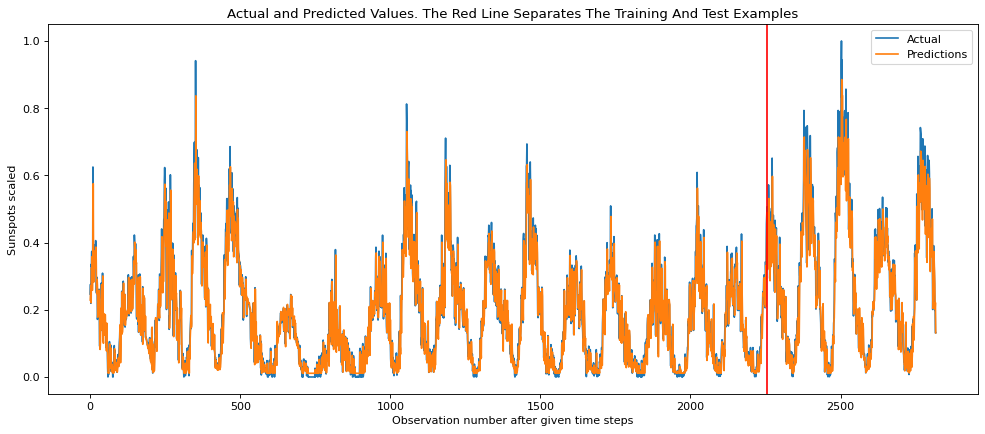

In [112]:
# hacemos predicciones
train_predict_FFNN = modelo_ffnn.predict(trainX_ffnn)
test_predict_FFNN = modelo_ffnn.predict(testX_ffnn)

# imprimimos el error
print_error(trainY_ffnn, testY_ffnn, train_predict_FFNN, test_predict_FFNN)

# graficamos los resultados de la red neuronal
plot_result(trainY_ffnn, testY_ffnn, train_predict_FFNN, test_predict_FFNN)

#### 2. Recurrent Neural Network (RNN)

In [113]:
# definimos el modelo de la red RNN
modelo_rnn = create_RNN(
    hidden_units=3
    , dense_units=1
    , input_shape=(time_steps,1)
    , activation=['tanh', 'tanh']
)
modelo_rnn.fit(trainX_rnn, trainY_rnn, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0628 - 1s/epoch - 8ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0318 - 349ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0272 - 355ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0240 - 348ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0215 - 348ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0191 - 354ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0168 - 346ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0144 - 346ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0119 - 346ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0096 - 345ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0074 - 354ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0062 - 380ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0059 - 346ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0057 - 380ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0055 - 354ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

2/2 [==============================] - 0s 4ms/step
Train RMSE: 0.072 RMSE
Test RMSE: 0.108 RMSE


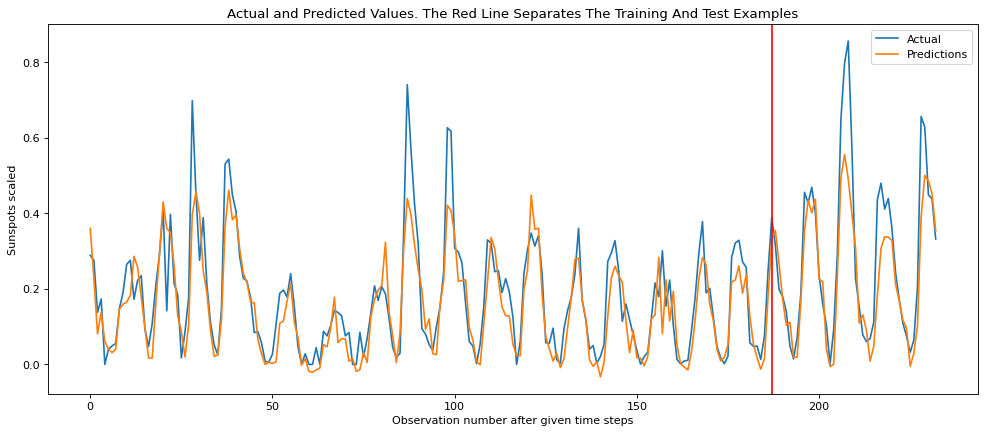

In [114]:
# hacemos predicciones
train_predict_RNN = modelo_rnn.predict(trainX_rnn)
test_predict_RNN = modelo_rnn.predict(testX_rnn)

# imprimimos el error
print_error(trainY_rnn, testY_rnn, train_predict_RNN, test_predict_RNN)

# graficamos los resultados de la red neuronal
plot_result(trainY_rnn, testY_rnn, train_predict_RNN, test_predict_RNN)

#### 3. Long Short-Term Memory (LSTM)

In [115]:
# Definimos el modelo de la red LSTM
modelo_lstm = create_LSTM(
    hidden_units=3,
    dense_units=1,
    input_shape=(time_steps, 1),
    activation=['tanh', 'tanh']
)
modelo_lstm.fit(trainX_lstm, trainY_lstm, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 3s - loss: 0.0113 - 3s/epoch - 15ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0057 - 524ms/epoch - 3ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0046 - 533ms/epoch - 3ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0044 - 509ms/epoch - 3ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0042 - 517ms/epoch - 3ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0042 - 525ms/epoch - 3ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0042 - 533ms/epoch - 3ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0041 - 527ms/epoch - 3ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0042 - 535ms/epoch - 3ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0039 - 520ms/epoch - 3ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0038 - 508ms/epoch - 3ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0038 - 505ms/epoch - 3ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0038 - 508ms/epoch - 3ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0037 - 506ms/epoch - 3ms/step
Epoch 15/20
187/187 - 1s - loss: 0.0036 - 519ms/epoch - 3ms/step
Epoch 16/20
187/187 - 1s - loss: 0.0

2/2 [==============================] - 0s 2ms/step
Train RMSE: 0.059 RMSE
Test RMSE: 0.082 RMSE


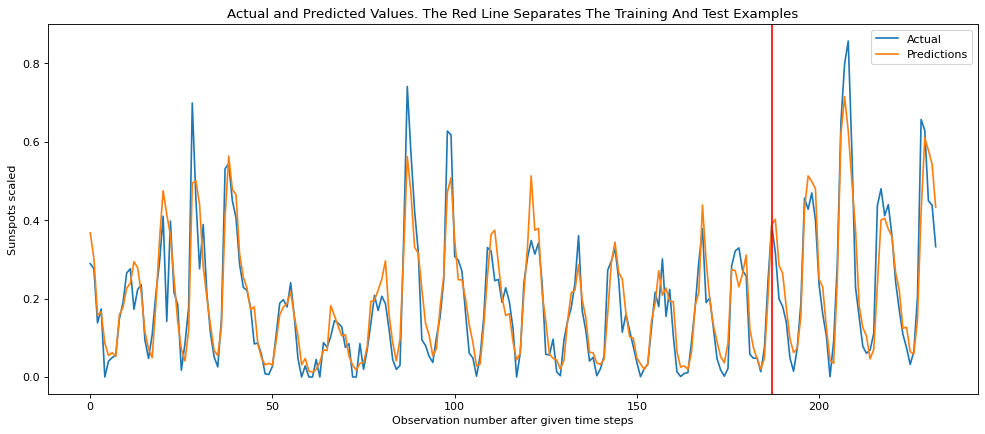

In [116]:
# hacemos predicciones
train_predict_LSTM = modelo_lstm.predict(trainX_lstm)
test_predict_LSTM = modelo_lstm.predict(testX_lstm)

# imprimimos el error
print_error(trainY_lstm, testY_lstm, train_predict_LSTM, test_predict_LSTM)

# graficamos los resultados de la red neuronal
plot_result(trainY_lstm, testY_lstm, train_predict_LSTM, test_predict_LSTM)

#### Comparando resultados

In [117]:
# Calcular los RMSE para cada modelo en el conjunto de prueba
test_rmse_FFNN = math.sqrt(mean_squared_error(testY_ffnn, test_predict_FFNN))
test_rmse_RNN = math.sqrt(mean_squared_error(testY_rnn, test_predict_RNN))
test_rmse_LSTM = math.sqrt(mean_squared_error(testY_lstm, test_predict_LSTM))

# Imprimir los resultados
print("RMSE en el conjunto de prueba:")
print("FFNN :", test_rmse_FFNN)
print("RNN  :", test_rmse_RNN)
print("LSTM :", test_rmse_LSTM)

# Comparar los RMSE de los modelos
best_model = min(test_rmse_FFNN, test_rmse_RNN, test_rmse_LSTM)
print("\nEl mejor modelo en el conjunto de prueba es:")
if best_model == test_rmse_FFNN:
    print("FFNN")
elif best_model == test_rmse_RNN:
    print("RNN")
else:
    print("LSTM")

RMSE en el conjunto de prueba:
FFNN : 0.07916747690662473
RNN  : 0.10786525085417042
LSTM : 0.08172808552803297

El mejor modelo en el conjunto de prueba es:
FFNN
